<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Óscar Guillermo Chiw Lozano & Mariana Urdiales.

**Fecha:** 15 de noviembre del 2023.

**Expediente** : 736814, 744444.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Guillermo-Chiw-ITESO/ProyectoModulo3_ChiwO_UrdialesM

# Proyecto Módulo 3

___
### 1.1 Introducción.
> Durante el Módulo 3 de esta materia, estubimos aprendiendo, comprendiendo, ejemplificando y analizado los temas de ecuaciones diferenciales representadas en problemas de crecimiento de población, modelos de ahorro, capitalización, movimiento de péndulo y  oscilación armónica. 
En este proyecto realizamos, modelamos, resolvimos y representamos estos temas utilizando las diferentes funciones, ecuaciones, librerias, gráficas, representaciones visuales y cálculos necesarios para su correcto funcionamiento, aplicación y resolución.


<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/200px-Double-Pendulum.svg.png" width="200" height="271" /> 


### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Escrbir un modelo físico mediante ecuaciones diferenciales solucionarlo numéricamente.
>  - Analizar gráficamente los resultados de los problemas y las ecuaciones diferenciales dodne se refleje el comportamiento.
> #### 1.2 Objetivos específicos
>  - Mediante el uso de ecuaciones diferenciales resolver el movimiento, ángulo y velocidad que generan dos péndulos basados en las leyes de Newton.
>  - Modelar los movimientos de los péndulos en una gráfica de ángulo-tiempo, la tráyectoria en "X" y "Y", y la velocidad.

### 1.3 Modelo que Representa el Problema

#### Ecuaciones Dinámicas

El péndulo doble es un sistema físico que consiste en dos péndulos, uno colgando del otro. Las ecuaciones que modelan este sistema son un conjunto de ecuaciones diferenciales de segundo orden, que se derivan utilizando las leyes de Newton para el movimiento rotacional:

$$
\begin{align}
\frac{d^2\theta_1}{dt^2} &= \frac{-g (2 m_1 + m_2) \sin(\theta_1) - m_2 g \sin(\theta_1 - 2 \theta_2) - 2 \sin(\theta_1 - \theta_2) m_2 \left( \left( \frac{d\theta_2}{dt} \right)^2 l_2 + \left( \frac{d\theta_1}{dt} \right)^2 l_1 \cos(\theta_1 - \theta_2) \right)}{l_1 (2 m_1 + m_2 - m_2 \cos(2\theta_1 - 2\theta_2))}, \\
\frac{d^2\theta_2}{dt^2} &= \frac{2 \sin(\theta_1 - \theta_2) \left( \left( \frac{d\theta_1}{dt} \right)^2 l_1 (m_1 + m_2) + g (m_1 + m_2) \cos(\theta_1) + \left( \frac{d\theta_2}{dt} \right)^2 l_2 m_2 \cos(\theta_1 - \theta_2) \right)}{l_2 (2 m_1 + m_2 - m_2 \cos(2\theta_1 - 2\theta_2))}
\end{align}
$$

#### Deducción del Modelo

Este modelo se deduce aplicando las leyes de Newton del movimiento y la conservación de energía. Las fuerzas que actúan sobre las masas de los péndulos incluyen la gravedad y las tensiones de los hilos. Estas fuerzas generan torques que resultan en el movimiento rotacional de las masas.

#### Significado y Limitaciones del Modelo

El modelo representa la dinámica de dos péndulos conectados entre sí, donde el movimiento del primero afecta al segundo. Este sistema es un ejemplo clásico de un sistema dinámico no lineal y puede exhibir comportamientos caóticos bajo ciertas condiciones.

Las limitaciones fundamentales del modelo incluyen:
- Supone que los hilos o barras de los péndulos son inextensibles y sin masa.
- No considera resistencia del aire o fricción en el punto de pivote.
- Asume que el movimiento se lleva a cabo en un plano bidimensional.

#### Significado y Valor de los Parámetros

- $( l_1, l_2 )$: Longitudes de los brazos de los péndulos.
- $( m_1, m_2 )$: Masas de los péndulos.
- $( g )$: Aceleración debida a la gravedad.
- $( \theta_1, \theta_2 )$: Ángulos de desplazamiento de cada péndulo respecto a la vertical.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Definir las ecuaciones diferenciales para el péndulo doble
def pendulo_doble(t, y, l1, l2, m1, m2, g):
    theta1, omega1, theta2, omega2 = y
    dydt = [omega1,
            (-g * (2*m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2*theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * l2 + omega1**2 * l1 * np.cos(theta1 - theta2))) /
            (l1 * (2*m1 + m2 - m2 * np.cos(2*theta1 - 2*theta2))),
            omega2,
            (2 * np.sin(theta1 - theta2) * (omega1**2 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * l2 * m2 * np.cos(theta1 - theta2))) /
            (l2 * (2*m1 + m2 - m2 * np.cos(2*theta1 - 2*theta2)))]
    return dydt

# Parámetros del péndulo doble
l1 = 1.0  # Longitud del primer brazo (metros)
l2 = 1.0  # Longitud del segundo brazo (metros)
m1 = 1.0  # Masa del primer péndulo (kilogramos)
m2 = 1.0  # Masa del segundo péndulo (kilogramos)
g = 9.81  # Aceleración debida a la gravedad (metros/segundo^2)

### 1.4 Simulaciones.
> - Se debe simular para un conjunto representativo de condiciones iniciales (las condiciones iniciales deben tener sentido).

In [3]:
# Condiciones iniciales
theta1_0 = np.pi/4  # Ángulo inicial del primer péndulo
omega1_0 = 0.0  # Velocidad angular inicial del primer péndulo
theta2_0 = np.pi/2  # Ángulo inicial del segundo péndulo
omega2_0 = 0.0  # Velocidad angular inicial del segundo péndulo

y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

# Definir el tiempo de integración
t = np.linspace(0, 10, 10000)  # De 0 a 10 segundos con 1000 puntos
t_span = (0, 10)  # De 0 a 10 segundos
t_eval = np.linspace(0, 10, 10000)  # Puntos de tiempo para la evaluación de la solución


# Resolver las ecuaciones diferenciales
sol = solve_ivp(pendulo_doble, t_span, y0, args=(l1, l2, m1, m2, g), t_eval=t_eval)

## Extraer los resultados
theta1 = sol.y[0, :]
omega1 = sol.y[1, :]
theta2 = sol.y[2, :]
omega2 = sol.y[3, :]

### 1.5 Visualización de resultados de simulación.


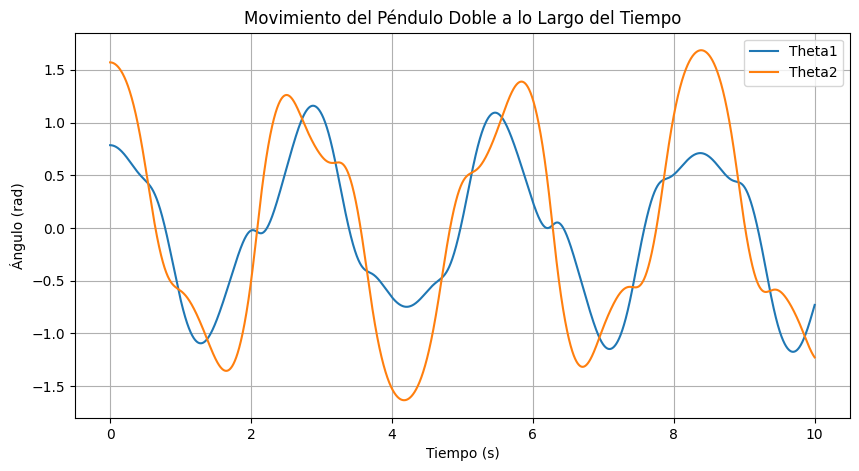

In [4]:
# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(sol.t, theta1, label='Theta1')
plt.plot(sol.t, theta2, label='Theta2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Movimiento del Péndulo Doble a lo Largo del Tiempo')
plt.legend()
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()


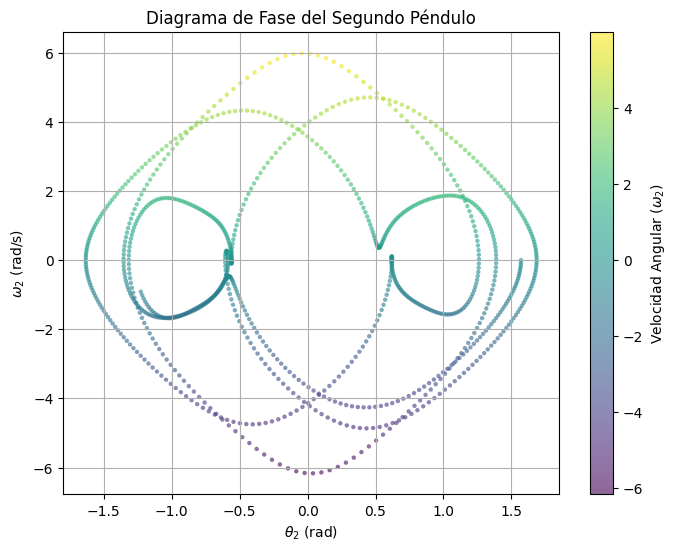

In [5]:
# Tiempo de integración
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver las ecuaciones diferenciales
sol = solve_ivp(pendulo_doble, t_span, y0, args=(l1, l2, m1, m2, g), t_eval=t_eval)

# Extraer los resultados para theta2 y omega2
theta2 = sol.y[2, :]
omega2 = sol.y[3, :]

# Gráfica del diagrama de fase para el segundo péndulo utilizando plt.scatter
plt.figure(figsize=(8, 6))
plt.scatter(theta2, omega2, cmap='viridis', c=omega2, s=10, alpha=0.6, edgecolor='none')
plt.xlabel('$\\theta_2$ (rad)')
plt.ylabel('$\\omega_2$ (rad/s)')
plt.title('Diagrama de Fase del Segundo Péndulo')
plt.colorbar(label='Velocidad Angular ($\\omega_2$)')
plt.grid(True)
plt.show()

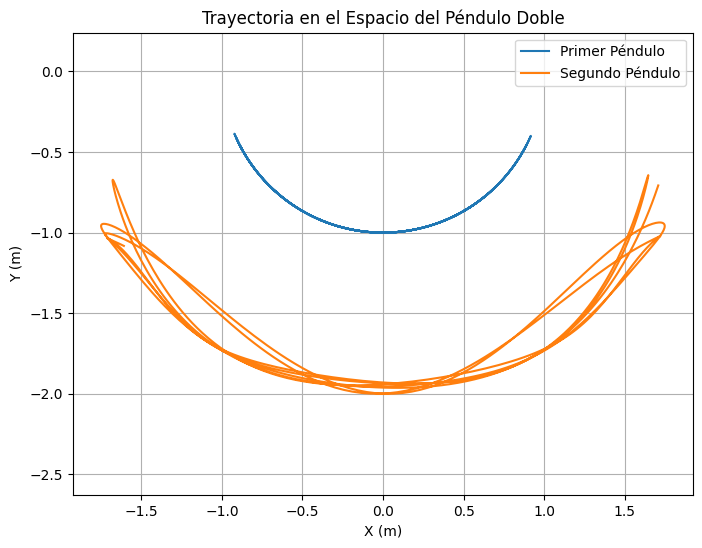

In [6]:
# Extraer los resultados para theta1 y theta2
theta1 = sol.y[0, :]
theta2 = sol.y[2, :]

# Calcular las posiciones en el espacio
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

# Gráfico de trayectoria en el espacio
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Primer Péndulo')
plt.plot(x2, y2, label='Segundo Péndulo')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Trayectoria en el Espacio del Péndulo Doble')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Para mantener la misma escala en ambos ejes
plt.show()

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> El péndulo doble. (s. f.). http://www.sc.ehu.es/sbweb/fisica3/oscilaciones/pendulo_doble/pendulo_doble.html
>
> La web de física - colección de problemas - problema ID 19. (s. f.). https://www.lawebdefisica.com/problemas/id19-sol20.php

___
## 2.1 Introducción.
> Debe describir el trabajo.

### 2.2 Objetivos.
> #### 2.1 Objetivo general.
>  - Escrbir un modelo físico mediante ecuaciones diferenciales solucionarlo numéricamente.
>  - Analizar gráficamente los resultados de los problemas y las ecuaciones diferenciales dodne se refleje el comportamiento.
> #### 2.2 Objetivos específicos
>  - Mediante ecuaciones diferenciales, resolver un problema modelo de amortización de préstamos basándonos en una ecuación de pago periódico u una fórmula de anualidad.
>  - Ejemplificar utilizando dos bancos reales los modelos de amortización presentando casos reales.


### 2.3 Modelo de Amortización de Préstamos

#### Ecuaciones Dinámicas

El modelo de amortización de préstamos se basa en la ecuación de pago periódico, que se calcula utilizando la fórmula de anualidad. La ecuación general para el pago periódico \( P \) es:

$[ P = \frac{r \times PV}{1 - (1 + r)^{-n}} ]$

donde:
- $( P )$ es el pago periódico.
- $( r )$ es la tasa de interés por período.
- $( PV )$ es el valor presente o principal del préstamo.
- $( n )$ es el número total de pagos.

#### Deducción del Modelo

El modelo se deduce a partir de la necesidad de distribuir uniformemente el pago de un préstamo a lo largo de su vida útil, teniendo en cuenta la tasa de interés. La fórmula se deriva del concepto de valor presente de una anualidad, que es la suma del valor presente de todos los pagos futuros.

#### Situación Representada por el Modelo

El modelo representa la situación de pagar un préstamo con una tasa de interés fija a lo largo de un período establecido. Cada pago incluye una parte que va hacia el interés y otra parte que reduce el principal del préstamo.

#### Limitaciones Fundamentales

- **Tasa de Interés Fija**: El modelo asume una tasa de interés constante, lo cual no siempre es aplicable en préstamos con tasas variables.
- **Pagos Constantes**: Se supone que los pagos son uniformes a lo largo del tiempo, lo cual puede no ser realista en todas las situaciones financieras.
- **No considera cambios en la situación financiera del prestatario**: El modelo no tiene en cuenta posibles variaciones en la capacidad de pago del prestatario a lo largo del tiempo.

#### Significado y Valor de los Parámetros

- **Valor Presente (PV)**: Representa la cantidad total del préstamo inicial.
- **Tasa de Interés por Período (r)**: Es la tasa de interés aplicada a cada período de pago, usualmente anual o mensual.
- **Número Total de Pagos (n)**: Es la cantidad total de pagos que se realizarán para liquidar el préstamo, generalmente definida por la duración del préstamo en años multiplicada por el número de pagos por año.

Este modelo simplifica la realidad financiera a una serie de supuestos y cálculos matemáticos, proporcionando una base sólida para entender cómo funcionan los préstamos y cómo se calculan los pagos. Sin embargo, en situaciones reales, factores adicionales como cambios en las tasas de interés, pagos adicionales al principal, y variaciones en la situación financiera del prestatario pueden influir significativamente en la estructura del préstamo.

In [7]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from datetime import date
from collections import OrderedDict
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

### 2.4 Simulaciones.
> - Se debe simular para un conjunto representativo de condiciones iniciales (las condiciones iniciales deben tener sentido).

In [8]:
# Función de amortización actualizada
def amortize(principal, interest_rate, years, addl_principal=0, annual_payments=12, start_date=date.today()):
    
    pmt = -round(npf.pmt(interest_rate/annual_payments, years*annual_payments, principal), 2)
    # inicializa las variables para realizar el seguimiento de los períodos y saldos
    p = 1
    beg_balance = principal
    end_balance = principal

    while end_balance > 0:
        # Recalcula el interés basado en el saldo actual
        interest = round(((interest_rate/annual_payments) * beg_balance), 2)

        # Determina el pago basado en si este período liquidará el préstamo
        pmt = min(pmt, beg_balance + interest)
        principal = pmt - interest

        # Ajusta el pago adicional si se está liquidando el préstamo
        addl_principal = min(addl_principal, beg_balance - principal)
        end_balance = beg_balance - (principal + addl_principal)

        yield OrderedDict([('Month',start_date),
                           ('Period', p),
                           ('Begin Balance', beg_balance),
                           ('Payment', pmt),
                           ('Principal', principal),
                           ('Interest', interest),
                           ('Additional_Payment', addl_principal),
                           ('End Balance', end_balance)])

        # Incrementa el contador, saldo y fecha
        p += 1
        start_date += relativedelta(months=1)
        beg_balance = end_balance

def amortization_table(principal, interest_rate, years, addl_principal=0, annual_payments=12, start_date=date.today()):

    # El pago permanece constante según los términos originales del préstamo.
    payment = -round(npf.pmt(interest_rate/annual_payments, years*annual_payments, principal), 2)
    # Genere el cronograma y ordene las columnas resultantes para mayor comodidad
    schedule = pd.DataFrame(amortize(principal, interest_rate, years, addl_principal, annual_payments, start_date))
    schedule = schedule[["Period", "Month", "Begin Balance", "Payment", "Interest", "Principal", "Additional_Payment", "End Balance"]]
    
    # Convertir a un objeto de fecha y hora para facilitar los cálculos posteriores
    schedule["Month"] = pd.to_datetime(schedule["Month"])

    # Crear una tabla de estadísticas resumidas
    payoff_date = schedule["Month"].iloc[-1]
    stats = pd.Series([payoff_date, schedule["Period"].count(), interest_rate, years, principal, payment, addl_principal, schedule["Interest"].sum()],
                      index=["Payoff Date", "Num Payments", "Interest Rate", "Years", "Principal", "Payment", "Additional Payment", "Total Interest"])
    
    return schedule, stats

## Banco 1: BBVA

In [9]:
principal_1 = 700000  # Ejemplo de principal
interest_rate_1 = 0.04  # Ejemplo de tasa de interés
years_1 = 30  # Ejemplo de duración en años
years_2 = 15  # Ejemplo de duración en años
addl_principal_1_1 = 0
addl_principal_1_2 = 200
addl_principal_1_3 = 50
annual_payments_1 = 12
start_date=date(2023, 11, 15)

schedule1 = pd.DataFrame(amortize(principal_1, interest_rate_1, years_1, addl_principal_1_1, annual_payments_1, start_date))
schedule1.head()

,Month,Period,Begin Balance,Payment,Principal,Interest,Additional_Payment,End Balance
0,2023-11-15,1,700000.00,3341.91,1008.58,2333.33,0,698991.42
1,2023-12-15,2,698991.42,3341.91,1011.94,2329.97,0,697979.48
2,2024-01-15,3,697979.48,3341.91,1015.31,2326.60,0,696964.17
3,2024-02-15,4,696964.17,3341.91,1018.70,2323.21,0,695945.47
4,2024-03-15,5,695945.47,3341.91,1022.09,2319.82,0,694923.38


In [10]:
schedule1.tail()

,Month,Period,Begin Balance,Payment,Principal,Interest,Additional_Payment,End Balance
355,2053-06-15,356,16541.70,3341.91,3286.77,55.14,0,13254.93
356,2053-07-15,357,13254.93,3341.91,3297.73,44.18,0,9957.20
357,2053-08-15,358,9957.20,3341.91,3308.72,33.19,0,6648.48
358,2053-09-15,359,6648.48,3341.91,3319.75,22.16,0,3328.73
359,2053-10-15,360,3328.73,3339.83,3328.73,11.10,0,0.00


In [11]:
schedule1, stats1 = amortization_table(principal_1, interest_rate_1, years_1, addl_principal_1_1, annual_payments_1, start_date)
schedule2, stats2 = amortization_table(principal_1, interest_rate_1, years_1, addl_principal_1_2, annual_payments_1, start_date)
schedule3, stats3 = amortization_table(principal_1, interest_rate_1, years_2, addl_principal_1_3, annual_payments_1, start_date)

pd.DataFrame([stats1, stats2, stats3])

,Payoff Date,Num Payments,Interest Rate,Years,Principal,Payment,Additional Payment,Total Interest
0,2053-10-15,360,0.04,30,700000,3341.91,0,503085.52
1,2050-10-15,324,0.04,30,700000,3341.91,200,444406.32
2,2038-08-15,178,0.04,15,700000,5177.82,50,228731.53


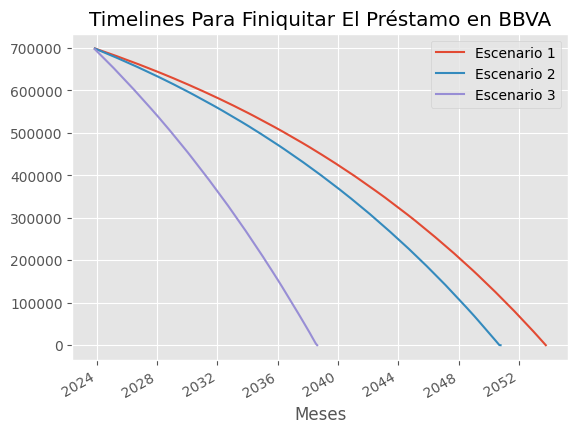

In [12]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1)
schedule1.plot(x='Month', y='End Balance', label="Escenario 1", ax=ax)
schedule2.plot(x='Month', y='End Balance', label="Escenario 2", ax=ax)
schedule3.plot(x='Month', y='End Balance', label="Escenario 3", ax=ax)

# Estableciendo el título del eje X
ax.set_xlabel("Meses")

plt.title("Timelines Para Finiquitar El Préstamo en BBVA");

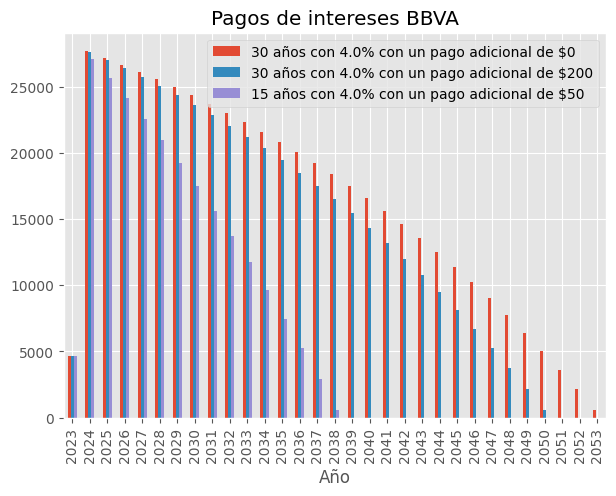

In [13]:
def make_plot_data(schedule, stats):
    y = schedule.set_index('Month')['Interest'].resample("A").sum().reset_index()
    y["Year"] = y["Month"].dt.year
    y.set_index('Year', inplace=True)
    y.drop('Month', axis=1, inplace=True)
    label = "{} años con {}% con un pago adicional de ${}".format(stats['Years'], stats['Interest Rate']*100, stats['Additional Payment'])
    return y, label
    
y1, label1 = make_plot_data(schedule1, stats1)
y2, label2 = make_plot_data(schedule2, stats2)
y3, label3 = make_plot_data(schedule3, stats3)

y = pd.concat([y1, y2, y3], axis=1)
figsize(7,5)
fig, ax = plt.subplots(1, 1)
y.plot(kind="bar", ax=ax)

# Estableciendo el título del eje X
ax.set_xlabel("Año")

plt.legend([label1, label2, label3], loc=1, prop={'size':10})
plt.title("Pagos de intereses BBVA");

## Banco 2: Santander

In [14]:
principal_2 = 700000  # Ejemplo de principal
interest_rate_2 = 0.06  # Ejemplo de tasa de interés
years_2_1 = 30  # Ejemplo de duración en años
years_2_2 = 15  # Ejemplo de duración en años
addl_principal_2_1 = 0
addl_principal_2_2 = 50
addl_principal_2_3 = 200
annual_payments_2 = 12
start_date2=date(2024, 1, 1)

schedule2 = pd.DataFrame(amortize(principal_2, interest_rate_2, years_2_1, addl_principal_2_1, annual_payments_2, start_date2))
schedule2.head()

,Month,Period,Begin Balance,Payment,Principal,Interest,Additional_Payment,End Balance
0,2024-01-01,1,700000.00,4196.85,696.85,3500.00,0,699303.15
1,2024-02-01,2,699303.15,4196.85,700.33,3496.52,0,698602.82
2,2024-03-01,3,698602.82,4196.85,703.84,3493.01,0,697898.98
3,2024-04-01,4,697898.98,4196.85,707.36,3489.49,0,697191.62
4,2024-05-01,5,697191.62,4196.85,710.89,3485.96,0,696480.73


In [15]:
schedule1.tail()

,Period,Month,Begin Balance,Payment,Interest,Principal,Additional_Payment,End Balance
355,356,2053-06-15,16541.70,3341.91,55.14,3286.77,0,13254.93
356,357,2053-07-15,13254.93,3341.91,44.18,3297.73,0,9957.20
357,358,2053-08-15,9957.20,3341.91,33.19,3308.72,0,6648.48
358,359,2053-09-15,6648.48,3341.91,22.16,3319.75,0,3328.73
359,360,2053-10-15,3328.73,3339.83,11.10,3328.73,0,0.00


In [16]:
schedule1, stats1 = amortization_table(principal_2, interest_rate_2, years_2_1, addl_principal_2_1, annual_payments_2, start_date2)
schedule2, stats2 = amortization_table(principal_2, interest_rate_2, years_2_1, addl_principal_2_2, annual_payments_2, start_date2)
schedule3, stats3 = amortization_table(principal_2, interest_rate_2, years_2_2, addl_principal_2_3, annual_payments_2, start_date2)

pd.DataFrame([stats1, stats2, stats3])

,Payoff Date,Num Payments,Interest Rate,Years,Principal,Payment,Additional Payment,Total Interest
0,2054-01-01,361,0.06,30,700000,4196.85,0,810869.47
1,2053-01-01,349,0.06,30,700000,4196.85,50,779953.33
2,2038-03-01,171,0.06,15,700000,5907.00,200,342299.56


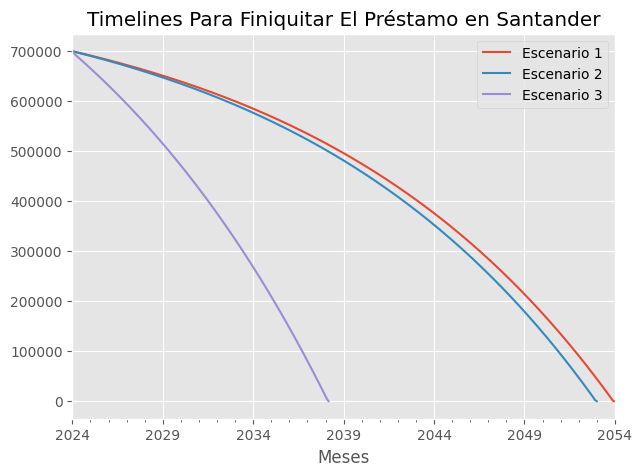

In [17]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1)
schedule1.plot(x='Month', y='End Balance', label="Escenario 1", ax=ax)
schedule2.plot(x='Month', y='End Balance', label="Escenario 2", ax=ax)
schedule3.plot(x='Month', y='End Balance', label="Escenario 3", ax=ax)

# Estableciendo el título del eje X
ax.set_xlabel("Meses")

plt.title("Timelines Para Finiquitar El Préstamo en Santander");

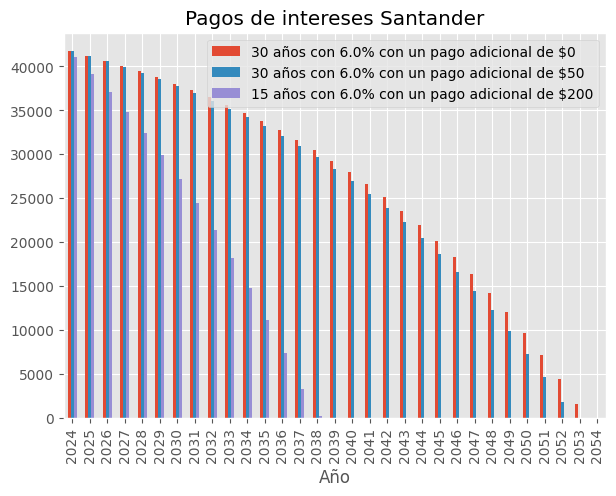

In [18]:
def make_plot_data(schedule, stats):
    y = schedule.set_index('Month')['Interest'].resample("A").sum().reset_index()
    y["Year"] = y["Month"].dt.year
    y.set_index('Year', inplace=True)
    y.drop('Month', axis=1, inplace=True)
    label = "{} años con {}% con un pago adicional de ${}".format(stats['Years'], stats['Interest Rate']*100, stats['Additional Payment'])
    return y, label
    
y1, label1 = make_plot_data(schedule1, stats1)
y2, label2 = make_plot_data(schedule2, stats2)
y3, label3 = make_plot_data(schedule3, stats3)

y = pd.concat([y1, y2, y3], axis=1)
figsize(7,5)
fig, ax = plt.subplots(1, 1)
y.plot(kind="bar", ax=ax)

# Estableciendo el título del eje X
ax.set_xlabel("Año")

plt.legend([label1, label2, label3], loc=1, prop={'size':10})
plt.title("Pagos de intereses Santander");

### 2.6 Conclusiones.
> Durante este proyecto reforzamos los conocimientos y aprendizajes esperados en el módulo aplicando los temas en situaciones cotidianas y más comunes de lo que uno puede pensar. Al realizar los problemas nos dimos cuenta de que gracias a las ecuaciones diferenciales podemos resolver múltiples cosas. 

>Al realizar el problema de tasa de interes de los bancos nos ayudó a adentrarnos más a temas financieros que tarde o temprano uno debe de saber al empezar una cuenta bancaria. El problema del péndulo nos ayudó a comprender el cmportamiento de este objeto que se puede plasmar de diferentes formas o ejemplificaciones que como ingenieros necesitamos saber y entender. 

> Gracias a las diferentes funciones, calculos y códigos podemos resolver problemas mátemáticos y cótidianos de una manera fácil, concreta y sin la necesidad de hacer tantos cálculos como uno podría pensar. Como ingenieros, esta materia es importante ya que nos genera razonamiento y conocimiento que nos facilitará nuestra vida laboral en el gremio y especialización de cada uno.  

### 2.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.
> 
> https://github.com/chris1610/pbpython/blob/master/notebooks/Amortization-Corrected-Final.ipynb
> 
> https://pbpython.com/amortization-model.html
> 
> https://pbpython.com/amortization-model-revised.html

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>